In [2]:
import numpy as np
from matplotlib import pyplot as plt
from imageio import imread

import random

%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Idea
----

We take an image. We try to make the network make it look like something else instead. Something it has learned.

Let us say we are given an image of a thing. Then we say to the net, pls make this image look like a 0 instead, whatever it's concept of a zero is.

How the net will backprop to the image
---

thing example continues.  
First we feed it the image and it generates some output. Throw that shit out idgaf abt dat shit. Now we apply the loss as if the real class that was meant for it was actually 0. Then we get during backprop, d(everything) and that includes dImage!!! We backprop on the image. We deduct the dImage from the image. That's it

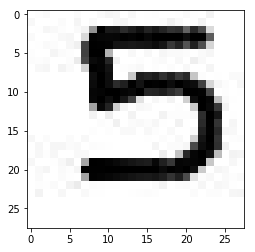

In [3]:
og_image = imread('custom_created_data/five_gray.jpg')
test_image = og_image.flatten().astype('float')
plt.imshow(og_image)

# Our test subject for the day is this nibba

In [4]:
# Load the model
import pickle

net = pickle.load(open('best_mnist_net.pickle', 'rb'))

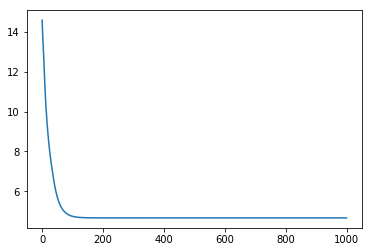

In [5]:
# Reload image everytime because it will change when we run this method
test_image = 255*np.ones(784) # og_image.flatten().astype('float')
make_it_look_like = 1

stats = net.fuck_the_image(test_image, [make_it_look_like], learning_rate=5000, 
                           num_iters=1000,
                           verbose=False)
plt.plot(stats['loss_history'])

Number of problematic things are  0 251


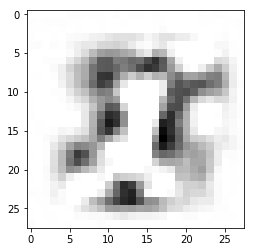

In [6]:
# Fix up the image a little bit, remove not image-like things
# keep pixel level bounded to 0, 255

rest_image = test_image.copy()
rest_image.resize((28, 28))
print("Number of problematic things are ", np.sum(rest_image < 0), np.sum(rest_image > 255))
rest_image[(rest_image < 0)] = 0
rest_image[rest_image > 255]= 255

plt.imshow(rest_image.astype('uint8'))

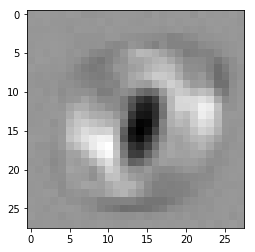

In [7]:
# If it is a black pixel then it has low weightage.
# That means white pixels are what that neuron is looking for
# if we intuit dot product is a similarity indicating operation

first_neuron_eyes = net.params['W1'][:, 1].copy()
plt.imshow(first_neuron_eyes.reshape(28, 28))